# 1. Linear Regression model using statsmodel

In [112]:
import numpy as np # creating and manipulating arrays
import matplotlib.pyplot as plt # visualizing data
import sklearn # regression models
import statsmodels.api as sm 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [88]:
df = pd.read_csv("C:\\Users\\srava\\Downloads\\garments_worker_productivity.csv")

In [89]:
df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

df['date'] = df['date'].astype('category')
df['date'] = df['date'].cat.codes
df = df.replace(np.nan, 0)

from scipy import stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
df1 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df1.shape

(936, 15)

In [90]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [91]:
y = df1['actual_productivity']
X = df1.drop('actual_productivity',axis=1)
X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0
1193,51,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0
1194,51,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0
1195,51,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0


In [92]:
model = sm.OLS(endog= y, exog= X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   0.975
Model:                             OLS   Adj. R-squared (uncentered):              0.975
Method:                  Least Squares   F-statistic:                              3292.
Date:                 Tue, 13 Sep 2022   Prob (F-statistic):                        0.00
Time:                         22:19:43   Log-Likelihood:                          623.44
No. Observations:                  936   AIC:                                     -1225.
Df Residuals:                      925   BIC:                                     -1172.
Df Model:                           11                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

C:\Users\srava\anaconda3\envs\BUSA\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# 2. The Best features are team, targeted_productivity, smv and incentive as the p-values are 0.05

# SGD implementation 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 1)

In [94]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000 , tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

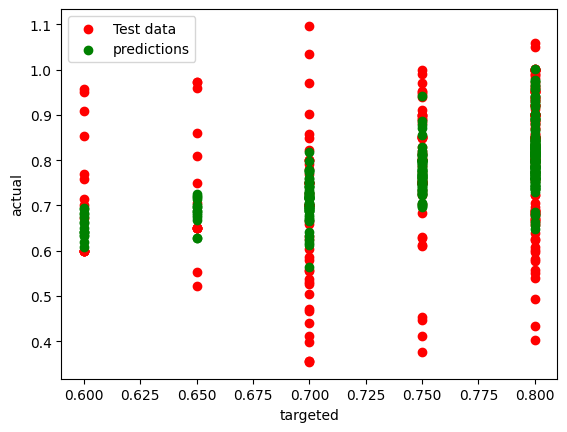

In [95]:
plt.scatter(X_test['targeted_productivity'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['targeted_productivity'], y_pred, color = "green", label = "predictions")
plt.xlabel("targeted")
plt.ylabel("actual")
plt.legend(loc="upper left")
plt.show()

In [96]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.015457081438760614
Validation MSE:  0.22196557116136587
R-squared: 0.28649905340760473


#     3.   
         The R2 Value for OLS Regression is 0.976
         The R2 Value for SGD Regression is 0.282
         The performance of OLS Regression is better than SGD Regression
    

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .35, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .35, random_state = 1)

# 4. Polynomial Regression 

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(alpha = 0.1,max_iter=1000, tol=1e-3,eta0 = 0.01, random_state=1)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

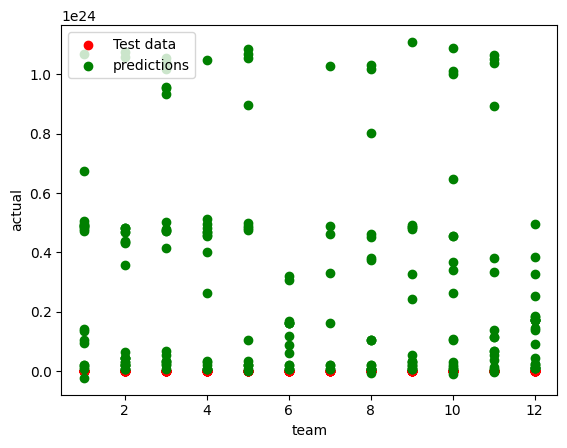

In [99]:
plt.scatter(X_test['team'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['team'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("team")
plt.ylabel("actual")
plt.legend(loc="upper left")
plt.show()

In [100]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  2.709468021875053e+47
Validation MSE:  2.42877146380042e+47
R-squared: -1.3051572951414067e+49


# 5. Lasso Regression 

In [101]:
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.017223619083485603
Validation MSE:  0.14953213517600258
R-squared: 0.2673683707355641


# 6. Ridge Regression 

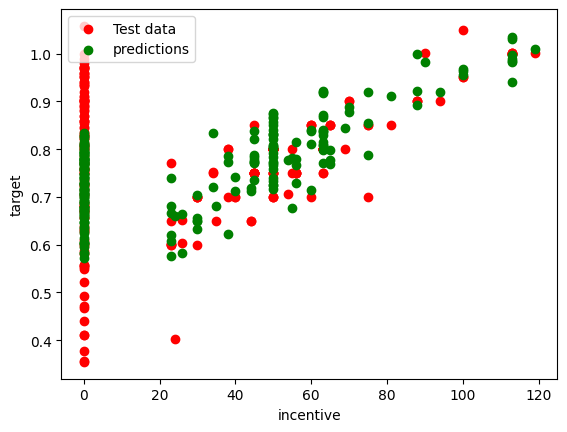

In [102]:
ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,  max_iter=1000, tol=1e-3, random_state=1))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['incentive'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['incentive'], y_pred, color = "green", label = "predictions")
plt.xlabel("incentive")
plt.ylabel("target")
plt.legend(loc="upper left")
plt.show()

In [103]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
ridge_val_pred = ridge.predict(X_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores
scores = cross_validate(ridge, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.0165287104624505
Validation MSE:  0.21917211911220058
R-squared: 0.23964304369488265


In [104]:
SGD = SGDRegressor()
parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive']})

In [105]:
clf.best_params_

{'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'huber'}

Early Stopping is a term used as reference to machine learning when discussing the prevention of overfitting of a model to dataset.

# 7. ElasticNet Regression 

In [106]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(early_stopping = True, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.015437090986366498
Validation MSE:  0.22082041427315777
R-squared: 0.31875715863264653


# 8. Best Model based on Performance Metrics